##### Content

##### Content

############12/09/2020###########


- **Data Collection**
- **Data Preprocessing**
     - <font color=blue>**Profile Report**</font>
     
     - <font color=blue>**Understanding Data Distribution of House Price Column**</font>
     - <font color=blue>**Missing Value Traetment**</font>
     - <font color=blue>**EDA**</font>
        

# Problem Statement

**The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim is to build a predictive model and find out the sales of each product at a particular store. Using this model, BigMart will try to understand the properties of products and stores which play a key role in increasing sales.**

## **Columns Description:**

* Item_Identifier : Unique product ID

* Item_Weight : Weight of product

* Item_Fat_Content : Whether the product is low fat or not

* Item_Visibility : The % of total display area of all products in a store allocated to the particular product

* Item_Type : The category to which the product belongs

* Item_MRP : Maximum Retail Price (list price) of the product

* Outlet_Identifier : Unique store ID

* Outlet_Establishment_Year : The year in which store was established

* Outlet_Size : The size of the store in terms of ground area covered

* Outlet_Location_Type : The type of city in which the store is located

* Outlet_Type : Whether the outlet is just a grocery store or some sort of supermarket

* Item_Outlet_Sales : Sales of the product in the particular store.


# Import Packages

In [22]:
#conda install -c conda -forge pandas-profiling

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_profiling import ProfileReport
pd.set_option("display.max_rows",100)
pd.set_option("display.max_columns",100)
from scipy.stats import norm
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

# Data Collection

In [2]:
data = pd.read_csv("/Users/sushilagadal/Desktop/SalesForecasting_Train.csv")

In [3]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


# Data Preprocessing

#### <font color=blue>**Profile Report**</font>

In [4]:
#profile = ProfileReport(data)
#import os
#os.chdir("/Users/sushilagadal/Desktop")
#profile.to_file(output_file="output.html")

#### <font color=blue>**understand Sales column**</font>

In [5]:
def understand_numeric_column(DataFrame,Col):
    
    """Finds the Skewness,Distribution and statistics of the column"""
    
    print("------------------")
    print("printing the summary statistics ",format(Col))
    print("")
    print(DataFrame[Col].describe())
    print("--------------------")
    print("The Skewness of" ,format(Col))
    print("Skewness: %f" % DataFrame[Col].skew())
    print("")
    print("--------------------")
    print("The distribution of ",format(Col))
    print("")
    print(sns.distplot(DataFrame[Col]))
    print("")
   

------------------
printing the summary statistics  Item_Outlet_Sales

count     8523.000000
mean      2181.288914
std       1706.499616
min         33.290000
25%        834.247400
50%       1794.331000
75%       3101.296400
max      13086.964800
Name: Item_Outlet_Sales, dtype: float64
--------------------
The Skewness of Item_Outlet_Sales
Skewness: 1.177531

--------------------
The distribution of  Item_Outlet_Sales

AxesSubplot(0.125,0.125;0.775x0.755)



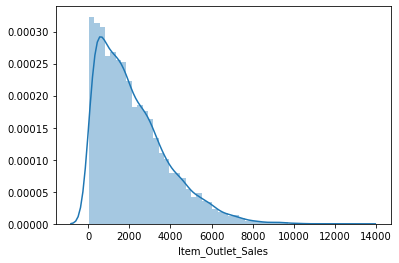

In [6]:
#we call the function our dataframe is data and column whose gave as 
#is Item_Outlet_Sales
understand_numeric_column(data,"Item_Outlet_Sales")

# Missing Value Treament

In [7]:
def Finding_Missing_Value(DataFrame): 
    
    """Find the Missing Value Percentage Column Wise"""
    
    total=DataFrame.isnull().sum().sort_values(ascending=False)
    percent=(DataFrame.isnull().sum()/DataFrame.isnull().count()).sort_values(ascending=False)
    missing_data=pd.concat([total,percent],axis=1, keys=["Total","Percent"])
    print("")
    print("--------------------")
   # print("Column wise Percentage of Missing Values",format(DataFrame))
    print("")
    print(missing_data)

In [8]:
#calling the finding missing value function which we defined above
Finding_Missing_Value(data)


--------------------

                           Total   Percent
Outlet_Size                 2410  0.282764
Item_Weight                 1463  0.171653
Item_Outlet_Sales              0  0.000000
Outlet_Type                    0  0.000000
Outlet_Location_Type           0  0.000000
Outlet_Establishment_Year      0  0.000000
Outlet_Identifier              0  0.000000
Item_MRP                       0  0.000000
Item_Type                      0  0.000000
Item_Visibility                0  0.000000
Item_Fat_Content               0  0.000000
Item_Identifier                0  0.000000


# 19 september

In [9]:
data["Item_Weight"]= data["Item_Weight"].fillna(value=data["Item_Weight"].mean())

In [10]:
data["Outlet_Size"].mode()

0    Medium
dtype: object

In [11]:
# I have to check later its not working
data["Outlet_Size"]= data["Outlet_Size"].fillna(value="Medium")

In [12]:
#this is for the missing value treament to drop the column
#data.dropna(inplace=True)

In [13]:
Finding_Missing_Value(data)


--------------------

                           Total  Percent
Item_Outlet_Sales              0      0.0
Outlet_Type                    0      0.0
Outlet_Location_Type           0      0.0
Outlet_Size                    0      0.0
Outlet_Establishment_Year      0      0.0
Outlet_Identifier              0      0.0
Item_MRP                       0      0.0
Item_Type                      0      0.0
Item_Visibility                0      0.0
Item_Fat_Content               0      0.0
Item_Weight                    0      0.0
Item_Identifier                0      0.0


# Exploratory Data Analysis

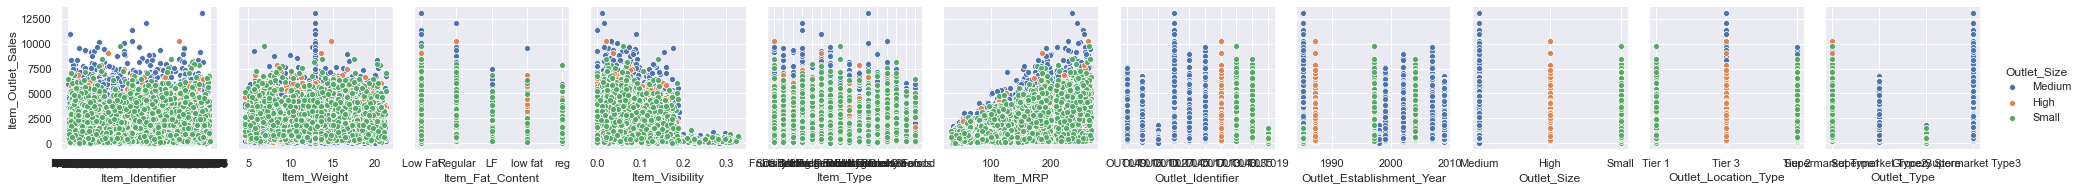

In [14]:
#scatterplot
sns.set()
Features_Cols=list(data.columns)[:-1]
sns.pairplot(data=data, y_vars=["Item_Outlet_Sales"],
                x_vars=Features_Cols, hue="Outlet_Size")

In [15]:
def find_top_N_Correlated_Feature(N,Col,DataFrame):
    """Prints the top N highly correlated feature matrix """
    
    corrmat = DataFrame.corr()
    cols = corrmat.nlargest(N, Col)[Col].index
    cm = np.corrcoef(DataFrame[cols].values.T)
    sns.set(font_scale=1.25)
    hm = sns.heatmap(cm, cbar=True, annot=True, square=True, yticklabels=cols.values, xticklabels=cols.values)
    plt.show()
    

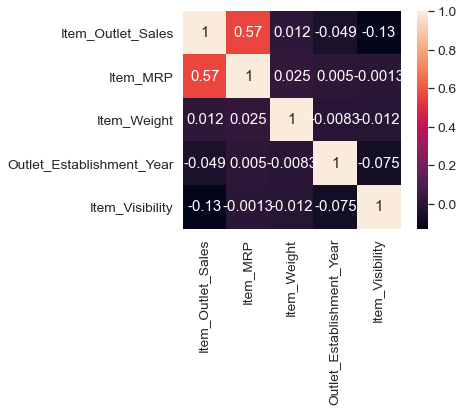

In [16]:
find_top_N_Correlated_Feature(5,"Item_Outlet_Sales",data)

In [ ]:
#we found that Item MRP is important reagrding Item_Outlet_Sales

# Outlier Detection and removal

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


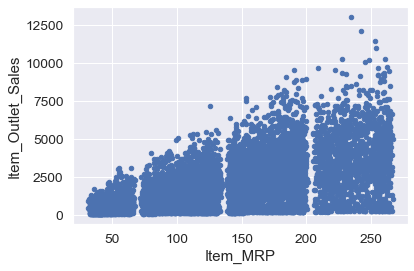

In [17]:
data.plot.scatter('Item_MRP', 'Item_Outlet_Sales')

In [18]:
data["Item_Outlet_Sales"].describe()

count     8523.000000
mean      2181.288914
std       1706.499616
min         33.290000
25%        834.247400
50%       1794.331000
75%       3101.296400
max      13086.964800
Name: Item_Outlet_Sales, dtype: float64

In [19]:
#Categorical boolean mask 
categorical_feature_mask = data.dtypes==object

#filter categorical columns using mask and turn it into alist
categorical_cols = data.columns[categorical_feature_mask].tolist()
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
data[categorical_cols]= data[categorical_cols].apply(lambda col: labelencoder.fit_transform(col.astype(str)))

In [20]:
X = data.drop(columns=["Item_Outlet_Sales"], axis=0)
y = data["Item_Outlet_Sales"]

Feature: 0, Score: 0.06616
Feature: 1, Score: 0.04441
Feature: 2, Score: 0.01295
Feature: 3, Score: 0.09057
Feature: 4, Score: 0.03279
Feature: 5, Score: 0.43042
Feature: 6, Score: 0.01679
Feature: 7, Score: 0.04001
Feature: 8, Score: 0.00823
Feature: 9, Score: 0.00657
Feature: 10, Score: 0.25110


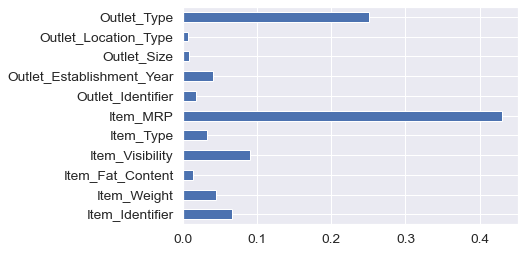

In [21]:
# random forest for feature importance on a regression problem
from sklearn.datasets import make_regression
from sklearn.ensemble import RandomForestRegressor
from matplotlib import pyplot

# define the model
model = RandomForestRegressor()
# fit the model
model.fit(X, y)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance

feat_importances = pd.Series(importance, index=X.columns)
feat_importances.plot(kind='barh')


Feature: 0, Score: -0.00939
Feature: 1, Score: -0.82590
Feature: 2, Score: 29.61587
Feature: 3, Score: -1382.76520
Feature: 4, Score: -1.22042
Feature: 5, Score: 15.59027
Feature: 6, Score: 59.82433
Feature: 7, Score: 0.17572
Feature: 8, Score: -338.67631
Feature: 9, Score: -222.13017
Feature: 10, Score: 880.70022


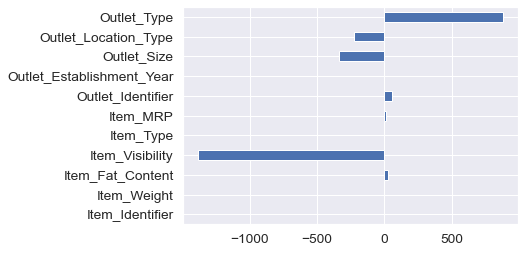

In [22]:
# linear regression feature importance
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot

model = LinearRegression()
# fit the model
model.fit(X, y)
# get importance
importance = model.coef_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
feat_importances = pd.Series(importance,index=X.columns)
feat_importances.plot(kind='barh')

